# PROJET

## 1. Télécharger le dataset imposé “project_dataset_bbc_text.csv”.


Importation des bibliothèques nécessaires

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
import tensorflow as tf


Téléchargement du data set

In [356]:
from google.colab import files
uploaded = files.upload()

Saving project_dataset_bbc_text.csv to project_dataset_bbc_text (6).csv


In [357]:
df = pd.read_csv('project_dataset_bbc_text.csv')

## 2. Présenter le dataset imposé

Affichage du data set entier

In [358]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


Affichage des 5 premières lignes du data set

In [359]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


Affichage de la dimension du data set

In [360]:
df.shape

(2225, 2)

2225 lignes / 2 colonnes

Affichage des noms de colonnes et de leur type

In [361]:
df.columns

Index(['category', 'text'], dtype='object')

Affichage des types de données

In [362]:
df.dtypes

,0
category,object
text,object


Les deux colonnes sont de type object et donc contiennent des valeurs textuelles

Affichage du nombre de valeurs nulles par colonnes

In [363]:
df.isnull().sum()

,0
category,0
text,0


Aucune valeurs nulles présentes dans chaque colonnes

Affichage de la répartition des articles par catégorie

In [364]:
df['category'].value_counts()

,count
category,
sport,511
business,510
politics,417
tech,401
entertainment,386


C'est donc les catégories Sport et Business qui possèdent le plus d'articles et les catégories Tech et Entertainment qui en possèdent le moins.

Quelques Visualisations graphiques

Répartition des articles par catégories

<ipython-input-365-8eefe0caf404>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


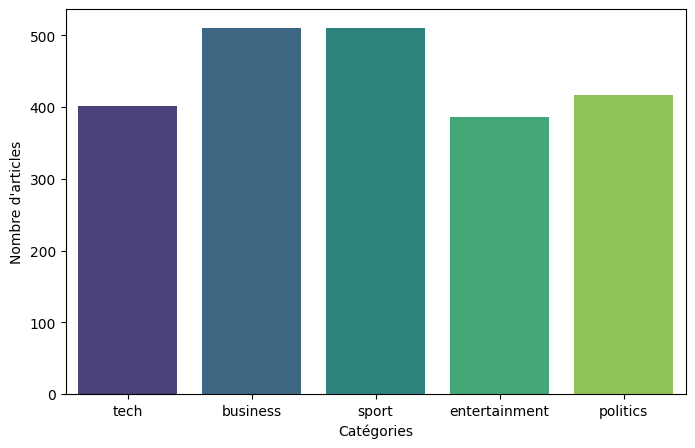

In [365]:
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df, palette='viridis')
plt.xlabel("Catégories")
plt.ylabel("Nombre d'articles")
plt.show()

Statistiques textuelles de base

In [366]:
df['text_length'] = df['text'].apply(len)
print("Statistiques de longueur des articles :")
print(df['text_length'].describe())

Statistiques de longueur des articles :
count     2225.00000
mean      2262.93618
std       1364.10253
min        501.00000
25%       1446.00000
50%       1965.00000
75%       2802.00000
max      25483.00000
Name: text_length, dtype: float64


Histogramme de longueur des articles

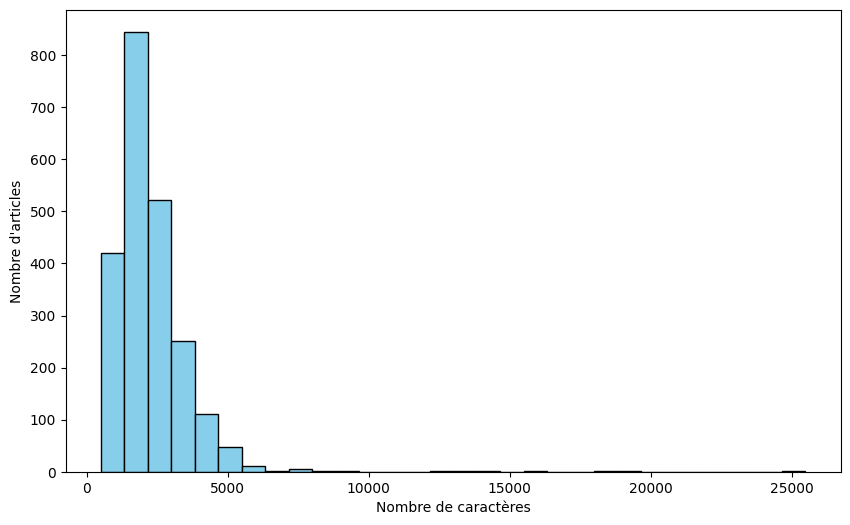

In [367]:
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre d'articles")
plt.show()

## 3. Nettoyer le dataset

Importation des bibliothèques et ressources nécessaires

In [368]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Instanciation du lemmatiseur

In [369]:
lemmatizer = WordNetLemmatizer()

Création de la fonction preprocessing pour pré traiter les articles

In [370]:
def preprocess_text(text):

    # 1. Supprimer les espaces en début et fin, puis réduire les espaces multiples
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)

    # 2. Convertir en minuscules
    text = text.lower()

    # 3. Supprimer les numéros
    text = re.sub(r'\d+', '', text)

    # 4. Supprimer la ponctuation
    text = re.sub(r'[^\w\s]', '', text)

    # 5. Tokeniser
    tokens = word_tokenize(text)

    # 6. Lemmatizer chaque mot
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Retourner la phrase nettoyée
    return ' '.join(tokens)

Appliquer le prétraitement à la colonne des critiques

In [371]:
df['text_cleaned'] = df['text'].apply(preprocess_text)
df

,category,text,text_length,text_cleaned
0,tech,tv future in the hands of viewers with home th...,4333,tv future in the hand of viewer with home thea...
1,business,worldcom boss left books alone former worldc...,1842,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,1342,tiger wary of farrell gamble leicester say the...
3,sport,yeading face newcastle in fa cup premiership s...,2176,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1579,ocean s twelve raid box office ocean s twelve ...
...,...,...,...,...
2220,business,cars pull down us retail figures us retail sal...,1745,car pull down u retail figure u retail sale fe...
2221,politics,kilroy unveils immigration policy ex-chatshow ...,955,kilroy unveils immigration policy exchatshow h...
2222,entertainment,rem announce new glasgow concert us band rem h...,1648,rem announce new glasgow concert u band rem ha...
2223,politics,how political squabbles snowball it s become c...,4684,how political squabble snowball it s become co...


## 4. Concevoir un modèle de Machine Learning

Préparation des données : séparer les features (textes) et les labels (catégories)



In [372]:
X = df['text_cleaned']
y = df['category']


Affichage des données séparées

In [373]:
X

,text_cleaned
0,tv future in the hand of viewer with home thea...
1,worldcom bos left book alone former worldcom b...
2,tiger wary of farrell gamble leicester say the...
3,yeading face newcastle in fa cup premiership s...
4,ocean s twelve raid box office ocean s twelve ...
...,...
2220,car pull down u retail figure u retail sale fe...
2221,kilroy unveils immigration policy exchatshow h...
2222,rem announce new glasgow concert u band rem ha...
2223,how political squabble snowball it s become co...


In [374]:
y

,category
0,tech
1,business
2,sport
3,sport
4,entertainment
...,...
2220,business
2221,politics
2222,entertainment
2223,politics


Division du dataset en ensembles d'entraînement et de test

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Affichage des données d'entrainement

In [376]:
X_train

,text_cleaned
1617,uganda ban vagina monologue uganda s authority...
1706,rem concert blighted by illness u rock band re...
1639,feta cheese battle reach court a row over whet...
1221,venezuela and china sign oil deal venezuelan p...
680,buyer snap up jet airway share investor have s...
...,...
1638,a november to remember last saturday one newsp...
1095,african double in edinburgh world m champion e...
1130,what price for trusted pc security you can now...
1294,o driscollgregan lead aid star ireland s brian...


In [377]:
X_test

,text_cleaned
414,brown and blair face new rift claim for the um...
420,small firm hit by rising cost rising fuel and ...
1644,spirit award hail sideways the comedy sideways...
416,microsoft release patch microsoft ha warned pc...
1232,arsenal through on penalty arsenal win on pena...
...,...
1075,news corp eye video game market news corp the ...
2053,domain system open door to scam a system to ma...
583,triple triumph for little britain top tv cult ...
767,lse doubt boost bidder share share in deutsche...


In [378]:
y_train

,category
1617,entertainment
1706,entertainment
1639,business
1221,business
680,business
...,...
1638,sport
1095,sport
1130,tech
1294,sport


In [379]:
y_test

,category
414,politics
420,business
1644,entertainment
416,tech
1232,sport
...,...
1075,business
2053,tech
583,entertainment
767,business


Création d'un pipeline pour le modèle de classification de texte

In [380]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())

])

In [381]:
pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

Définition des paramètres pour la recherche

In [382]:
parameters = {
    'tfidf__max_df': [0.75, 1.0],
    'tfidf__min_df': [1, 2],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.01, 0.1, 1, 10]
}

In [383]:
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)

In [384]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.01, 0.1, 1, 10],
                         'tfidf__max_df': [0.75, 1.0], 'tfidf__min_df': [1, 2],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

Entrainement du modèle

In [385]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.01, 0.1, 1, 10],
                         'tfidf__max_df': [0.75, 1.0], 'tfidf__min_df': [1, 2],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

Affichage des meilleurs paramètres trouvés

In [386]:
grid_search.best_params_

{'nb__alpha': 0.01,
 'tfidf__max_df': 0.75,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1)}

Entrainement du modèle avec les meilleurs paramètres

In [387]:
best_model = grid_search.best_estimator_

In [388]:
best_model

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.75)),
                ('nb', MultinomialNB(alpha=0.01))])

Évaluation du modèle

In [389]:
y_pred = best_model.predict(X_test)

In [390]:
y_pred

array(['politics', 'business', 'entertainment', 'tech', 'sport',
       'business', 'tech', 'sport', 'sport', 'tech', 'entertainment',
       'entertainment', 'entertainment', 'entertainment', 'entertainment',
       'tech', 'politics', 'sport', 'entertainment', 'politics',
       'entertainment', 'entertainment', 'business', 'politics',
       'politics', 'politics', 'politics', 'sport', 'entertainment',
       'sport', 'politics', 'tech', 'politics', 'entertainment',
       'business', 'entertainment', 'tech', 'business', 'tech', 'sport',
       'business', 'sport', 'entertainment', 'business', 'entertainment',
       'entertainment', 'business', 'sport', 'entertainment', 'sport',
       'politics', 'sport', 'entertainment', 'entertainment',
       'entertainment', 'business', 'politics', 'business',
       'entertainment', 'business', 'entertainment', 'tech', 'business',
       'business', 'politics', 'sport', 'sport', 'entertainment',
       'business', 'business', 'tech', 'busines

Résultat de l'évaluation

In [391]:
print("Précision du modèle :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Précision du modèle : 0.9745508982035929
               precision    recall  f1-score   support

     business       0.99      0.94      0.97       164
entertainment       0.98      0.96      0.97       113
     politics       0.93      0.98      0.95       113
        sport       1.00      1.00      1.00       146
         tech       0.96      1.00      0.98       132

     accuracy                           0.97       668
    macro avg       0.97      0.98      0.97       668
 weighted avg       0.98      0.97      0.97       668



In [392]:
print("Meilleur estimateur :", grid_search.best_estimator_)
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Score sur l'ensemble de test :", grid_search.score(X_test, y_test))

Meilleur estimateur : Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.75)),
                ('nb', MultinomialNB(alpha=0.01))])
Meilleurs hyperparamètres : {'nb__alpha': 0.01, 'tfidf__max_df': 0.75, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Score sur l'ensemble de test : 0.9745508982035929


Affichage des courbes d'apprentissage et d'erreur

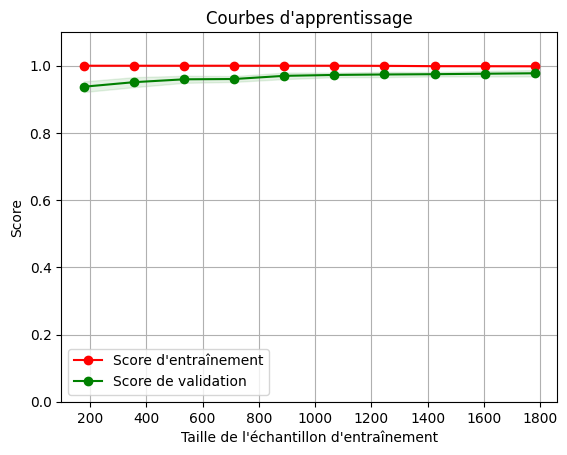

In [393]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calculer les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    best_model,
    X,
    y,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculer les moyennes et les écarts-types
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer les courbes
plt.figure()
plt.title("Courbes d'apprentissage")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.grid()

# Tracer les courbes d'entraînement
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")

# Tracer les courbes de test
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")

plt.legend(loc="best")
plt.show()


Pour conclure cette partie, le score est de 0,97 ce qui signifie que le modèle est très significatif

## 5. Concevoir un modèle de Deep Learning

In [450]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Prétraitement et Tokenization
nltk.download('stopwords')
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text_cleaned'])
X_seq = tokenizer.texts_to_sequences(df['text_cleaned'])
X_padded = pad_sequences(X_seq, maxlen=100)

# Encodage des étiquettes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Division des données en ensembles d'entraînement et de test
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Conversion des étiquettes en format one-hot encoding
y_train_dl = to_categorical(y_train_dl, num_classes=5)
y_test_dl = to_categorical(y_test_dl, num_classes=5)

# Définition du modèle LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(5, activation='softmax'))

# Compilation du modèle
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping
es = EarlyStopping(patience=5, restore_best_weights=True)

# Entraînement du modèle
history = lstm_model.fit(X_train_dl, y_train_dl,
                         epochs=10,  # Ajustable
                         batch_size=32,
                         validation_split=0.2,
                         callbacks=[es],
                         verbose=1)

# Évaluation du modèle
loss, accuracy = lstm_model.evaluate(X_test_dl, y_test_dl)
print(f'LSTM Test Accuracy: {accuracy}')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.2486 - loss: 1.5856 - val_accuracy: 0.4438 - val_loss: 1.5443
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - accuracy: 0.4750 - loss: 1.3053 - val_accuracy: 0.6096 - val_loss: 1.0850
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.6294 - loss: 0.9678 - val_accuracy: 0.6657 - val_loss: 0.8601
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.7041 - loss: 0.7589 - val_accuracy: 0.7388 - val_loss: 0.6676
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 117ms/step - accuracy: 0.8448 - loss: 0.4941 - val_accuracy: 0.8539 - val_loss: 0.5007
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.9415 - loss: 0.2590 - val_accuracy: 0.8764 - val_loss: 0.3968
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.9501 - loss: 0.1989 - val_accuracy: 0.8736 - val_loss: 0.4379
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.9789 - loss: 0.1197 - val_accuracy: 0.8904 -

Le modèle DL est moins bien entrainé que le ML car il a un score plus faible que l'autre.

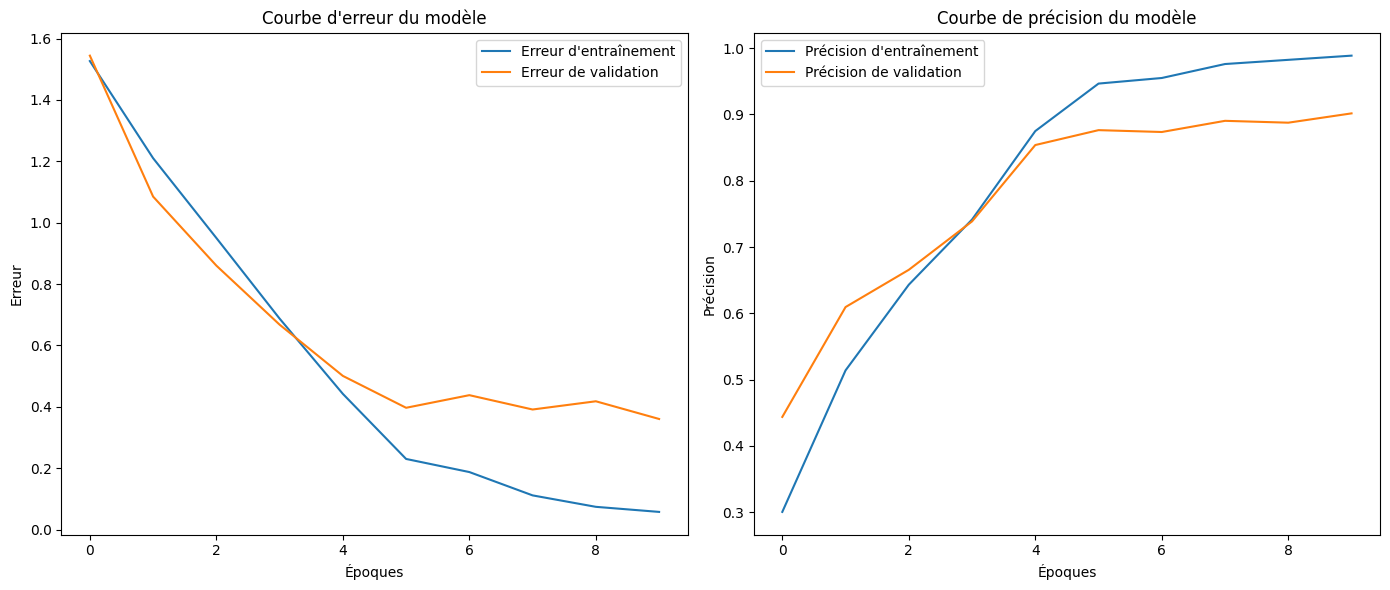

In [451]:
import matplotlib.pyplot as plt

# Affichage de la courbe de précision
plt.figure(figsize=(14, 6))

# Courbe d'erreur (perte) pendant l'entraînement et la validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Erreur d\'entraînement')
plt.plot(history.history['val_loss'], label='Erreur de validation')
plt.title('Courbe d\'erreur du modèle')
plt.xlabel('Époques')
plt.ylabel('Erreur')
plt.legend()

# Courbe de précision pendant l'entraînement et la validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.title('Courbe de précision du modèle')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()


## 6. Effectuer une prédiction

Rassemblement des articles dans une même liste

In [473]:
new_articles = [
    'Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.',
    'Additionally, the microsite on Amazon.in highlights some of the key features of the Mi 10. It shows that the phone will come with a 108-megapixel primary camera that will have optical image stabilisation (OIS) and 8K video recording. The microsite also claims that the Mi 10 will carry the worlds fastest wireless charging and include Qualcomm Snapdragon 865 SoC. You can also expect a 3D curved TrueColor E3 AMOLED display with a Corning Gorilla Glass protection on top and stereo speakers.',
    'Having undergone a surgery for shoulder dislocation last month, young Australian pacer Jhye Richardson is hopeful of recovering from the recurring injury by the time cricketing action resumes. Cricket Australias chief medical officer Alex Kountouris sounded optimistic of the fast bowlers recovery process with respect to a comeback later this year. It’s a lengthy surgery but it does give him an opportunity now that we’re not going to play until ... September, October, November or December ... he’s obviously a chance with that, Kountouris told News Corp in an interaction.'
]

Application de la fonction preprocess sur la liste des articles

In [481]:
for i in range (len(new_articles)):
  new_articles[i] = preprocess_text(new_articles[i])

In [ ]:
Prediction avec le modèle ML

In [482]:
prediction1 = best_model.predict(new_articles)
prediction1

array(['sport', 'tech', 'sport'], dtype='<U13')

Prediction avec le modèle DL

In [476]:
from tensorflow.keras.preprocessing.text import Tokenizer

new_articles_tokenized = tokenizer.texts_to_sequences(new_articles)

In [477]:
new_articles_padded = pad_sequences(new_articles_tokenized, dtype='int32', padding='post', maxlen=100)  # Ajustez à 100


In [478]:
prediction2 = lstm_model.predict(new_articles_padded)
prediction2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


array([[1.19032935e-04, 1.50269523e-04, 2.75441998e-04, 1.81609757e-05,
        9.99437034e-01],
       [1.19192489e-04, 1.50577616e-04, 2.76284001e-04, 1.82024633e-05,
        9.99435723e-01],
       [1.30865868e-04, 1.62386277e-04, 3.00009531e-04, 1.98231301e-05,
        9.99386907e-01]], dtype=float32)

In [479]:
predicted_class = prediction2.argmax(axis=1)
predicted_class_name= label_encoder.inverse_transform(predicted_class)

In [480]:
print("Prédictions avec le modèle DL :", predicted_class_name)

Prédictions avec le modèle DL : ['tech' 'tech' 'tech']


On peut voir que les prédictions ne sont pas les mêmes pour la première et la deuxième ligne, d'après les scores le modèle ML est le plus fiable et en effet c'est celui qui correspond au mieux aux articles.